# Penerapan Algoritma Machine Learning Klasifikasi
- **Nama:** Muhamad Fajri Permana Haryanto
- **Email:** muhamadfajri2804@gmail.com
- **ID Dicoding:** mijimo



# **1. Import Library**

Beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning ini.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from scipy.stats import randint
from sklearn.model_selection import learning_curve

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file hasil_clustering.CSV ke dalam variabel DataFrame.

In [2]:
retail_df = pd.read_csv("datadicoding/hasil_clustering.csv")
retail_df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,Quantity_binned,Total_Amount_binned,Cluster
0,1,-0.520462,0.428438,-0.686091,-0.547352,True,False,False,Low,Low,2
1,0,-1.106092,-0.452617,1.675480,0.962352,False,True,False,Low,High,0
2,1,0.650798,-1.333672,-0.791050,-0.760486,False,False,True,Low,Low,3
3,1,-0.300851,-1.333672,1.675480,0.074291,False,True,False,Low,Low,3
4,1,-0.813277,-0.452617,-0.686091,-0.636158,True,False,False,Low,Low,1


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        911 non-null    int64  
 1   Age                           911 non-null    float64
 2   Quantity                      911 non-null    float64
 3   Price per Unit                911 non-null    float64
 4   Total Amount                  911 non-null    float64
 5   Product Category_Beauty       911 non-null    bool   
 6   Product Category_Clothing     911 non-null    bool   
 7   Product Category_Electronics  911 non-null    bool   
 8   Quantity_binned               911 non-null    object 
 9   Total_Amount_binned           911 non-null    object 
 10  Cluster                       911 non-null    int64  
dtypes: bool(3), float64(4), int64(2), object(2)
memory usage: 59.7+ KB


In [4]:
print(f"Dataset memiliki {retail_df.shape[0]} baris dan {retail_df.shape[1]} kolom.\n")

Dataset memiliki 911 baris dan 11 kolom.



In [5]:
print("\nJumlah missing values tiap kolom:")
retail_df.isnull().sum()


Jumlah missing values tiap kolom:


Gender                          0
Age                             0
Quantity                        0
Price per Unit                  0
Total Amount                    0
Product Category_Beauty         0
Product Category_Clothing       0
Product Category_Electronics    0
Quantity_binned                 0
Total_Amount_binned             0
Cluster                         0
dtype: int64

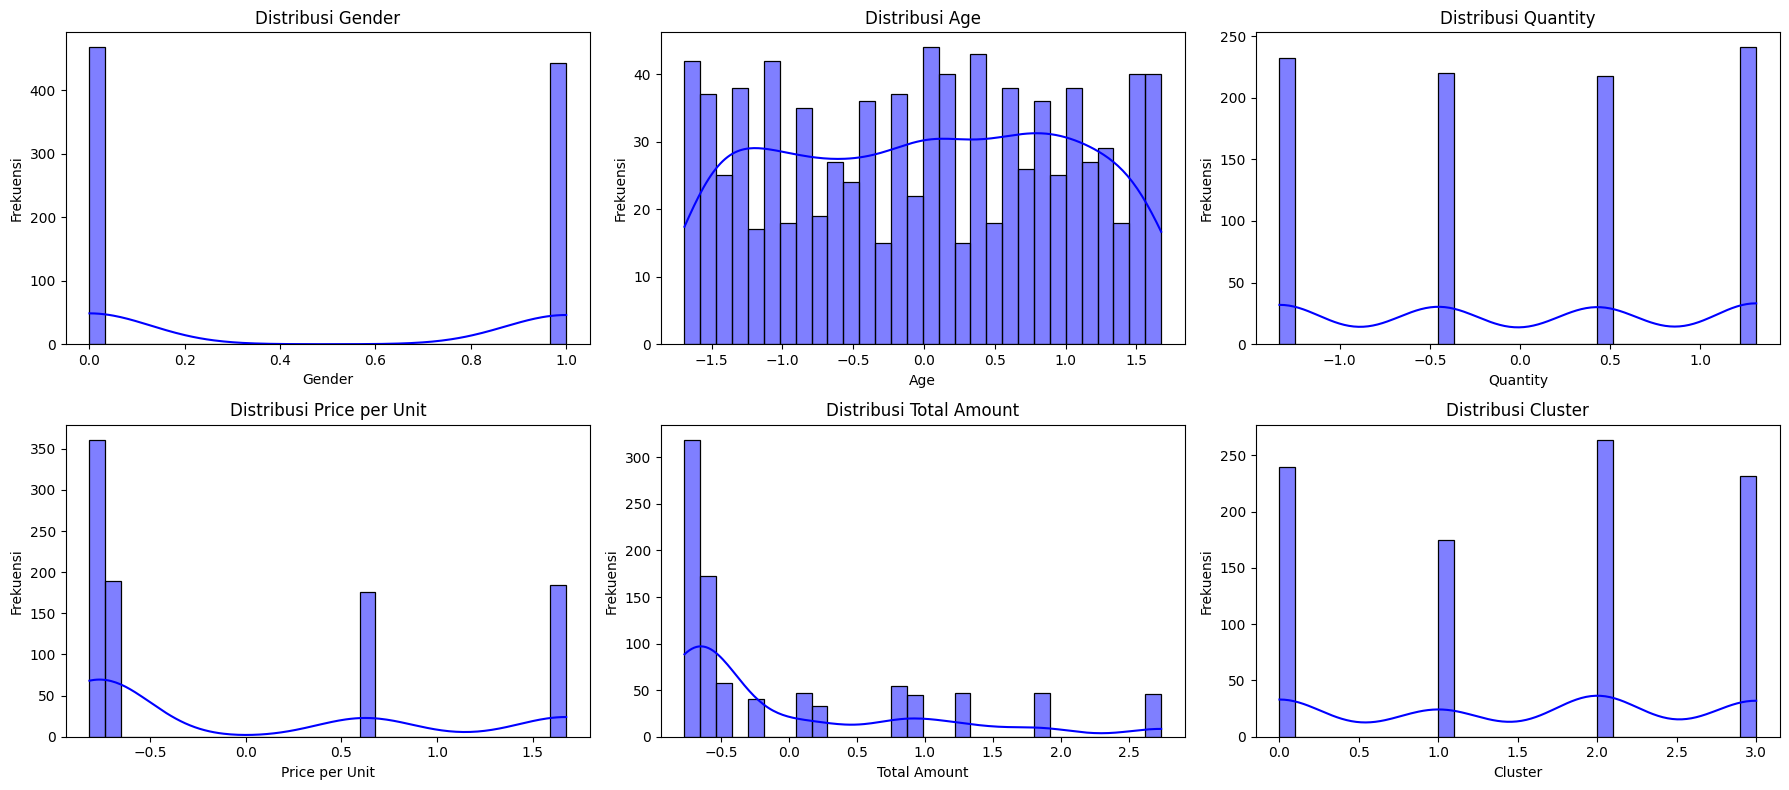

In [6]:
numerical_cols = retail_df.select_dtypes(include=['int64', 'float64']).columns
n_cols = 3
n_rows = (len(numerical_cols) // n_cols) + (len(numerical_cols) % n_cols > 0)
plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(retail_df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

**Distribusi target per cluster**

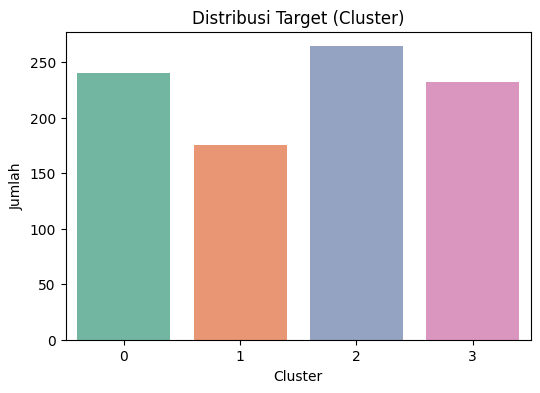

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=retail_df, x='Cluster', palette='Set2', hue='Cluster', dodge=False, legend=False)
plt.title('Distribusi Target (Cluster)')
plt.xlabel('Cluster')
plt.ylabel('Jumlah')
plt.show()

# **3. Data Splitting**

## **Laber Encoder**

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns  = retail_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    retail_df[col] = label_encoder.fit_transform(retail_df[col])

retail_df.head()


,Gender,Age,Quantity,Price per Unit,Total Amount,Product Category_Beauty,Product Category_Clothing,Product Category_Electronics,Quantity_binned,Total_Amount_binned,Cluster
0,1,-0.520462,0.428438,-0.686091,-0.547352,True,False,False,1,1,2
1,0,-1.106092,-0.452617,1.675480,0.962352,False,True,False,1,0,0
2,1,0.650798,-1.333672,-0.791050,-0.760486,False,False,True,1,1,3
3,1,-0.300851,-1.333672,1.675480,0.074291,False,True,False,1,1,3
4,1,-0.813277,-0.452617,-0.686091,-0.636158,True,False,False,1,1,1


## **Memisahkan Data**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set). Untuk itu diambil keputusan 80% data untuk training set dan 20% data untuk test set, untuk data yang digunakannya dilakukan secara acak (random split) untuk memastikan bahwa data yang digunakan untuk training dan testing tidak memiliki bias.

In [9]:
X = retail_df.drop(columns=['Cluster'])
y = retail_df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Ukuran data latih: {X_train.shape[0]} baris, {X_train.shape[1]} kolom")
print(f"Ukuran data uji: {X_test.shape[0]} baris, {X_test.shape[1]} kolom")

Ukuran data latih: 728 baris, 10 kolom
Ukuran data uji: 183 baris, 10 kolom


## **a.Mengecek distribusi target pada training set**

In [10]:
train_distribution = y_train.value_counts()
print("Distribusi Target pada Training Set:")
train_distribution

Distribusi Target pada Training Set:


Cluster
2    219
0    189
3    182
1    138
Name: count, dtype: int64

## **b.Mengecek distribusi target pada test set**

In [11]:
test_distribution = y_test.value_counts()
print("\nDistribusi Target pada Test Set:")
test_distribution


Distribusi Target pada Test Set:


Cluster
0    51
3    50
2    45
1    37
Name: count, dtype: int64

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### Model 1: Random Forest

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Akurasi Random Forest: {rf_accuracy}')

Akurasi Random Forest: 1.0


### Model 2: Decision Tree

In [13]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Akurasi Decision Tree: {dt_accuracy}')

Akurasi Decision Tree: 1.0


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### Model 1: Random Forest

In [14]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1_score = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Akurasi Random Forest: {rf_accuracy:.4f}")
print(f"F1-Score Random Forest: {rf_f1_score:.4f}")

print("\nClassification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

Akurasi Random Forest: 1.0000
F1-Score Random Forest: 1.0000

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        50

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



**Random Forest**
- Akurasi: 100%

Hasil evaluasi menunjukkan bahwa Random Forest berhasil memprediksi kelas dengan sangat baik, menghasilkan akurasi 100% pada data uji. Ini menunjukkan bahwa model ini mampu mempelajari pola dari data latih dengan sangat baik.

- F1-Score: 100%

Dengan F1-Score 100%, model ini memiliki keseimbangan yang sangat baik antara presisi dan recall, yang menunjukkan bahwa prediksi positif dan negatifnya sangat tepat.

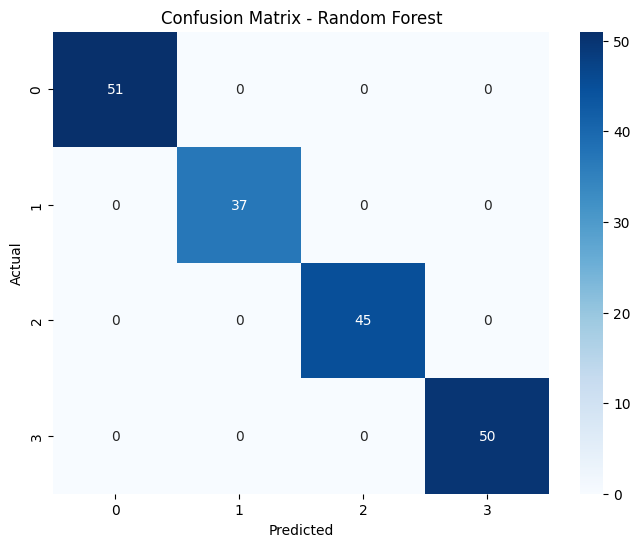

In [15]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model 2: Decision Tree

In [16]:
y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1_score = f1_score(y_test, y_pred_dt, average='weighted')

print(f"Akurasi Decision Tree: {dt_accuracy:.4f}")
print(f"F1-Score Decision Tree: {dt_f1_score:.4f}")

print("\nClassification Report Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Akurasi Decision Tree: 1.0000
F1-Score Decision Tree: 1.0000

Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        50

    accuracy                           1.00       183
   macro avg       1.00      1.00      1.00       183
weighted avg       1.00      1.00      1.00       183



**Decision Tree**
- Akurasi: 100%

Seperti halnya Random Forest,Decision Tree juga menghasilkan akurasi 100%, yang berarti model ini juga sangat baik dalam memprediksi kelas pada data uji.

- F1-Score: 100%

Model Decision Tree juga menunjukkan keseimbangan presisi dan recall yang sangat baik, dengan nilai F1-Score 100%.

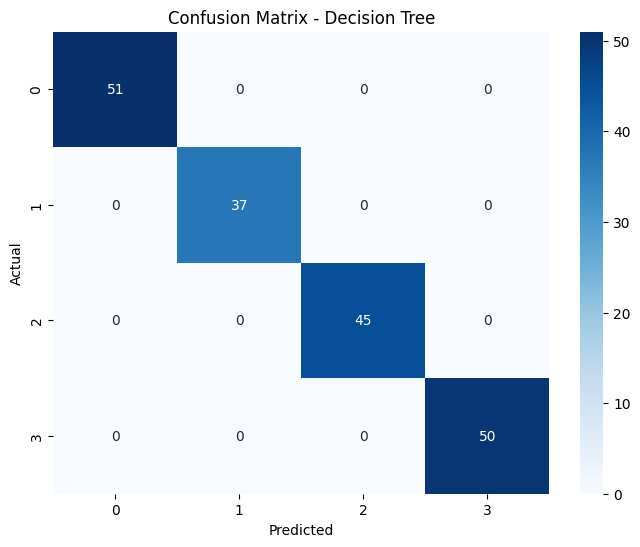

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

karena hasilnnya 100% semua baik Akurasi, F1-Score, Precision, dan Recall, perlu dilakukan pengecek kembali apakah terjadi overfiting pada data

In [18]:
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Akurasi pada Data Latih: {train_accuracy * 100:.2f}%")
print(f"Akurasi pada Data Uji: {test_accuracy * 100:.2f}%")


Akurasi pada Data Latih: 100.00%
Akurasi pada Data Uji: 100.00%


Berdasarkan data tersebut akurasi data latih dan uji sama sama 100%/tidak ada yang lebih besar atau kecil, berarti model/data inih tidak mengalami overfiting, kemungkinan besar data yang digunakan **bener benar valid dan sesuai.**

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

### Random Forest RandomizedSearchCV

In [19]:
param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_model = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)
print(f'Best Parameters for Random Forest: {random_search_rf.best_params_}')

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 64}


**hasil yang didapat (Random Forest):**
- max_depth: None
 - Model tidak membatasi kedalaman pohon, memungkinkan pohon tumbuh hingga mencapai kedalaman yang diperlukan untuk memisahkan data dengan baik.
- min_samples_leaf: 4
 - Setiap daun pohon memerlukan minimal 4 sampel untuk mencegah pembuatan daun dengan sampel yang terlalu sedikit, yang bisa menyebabkan overfitting.
- min_samples_split: 6
 - Untuk membagi sebuah node, dibutuhkan minimal 6 sampel. Ini mengurangi kompleksitas pohon dan mencegah pembuatan cabang yang tidak bermakna.
- n_estimators: 64
 - Model ini terdiri dari 64 pohon keputusan, yang membantu mengurangi variabilitas dan meningkatkan stabilitas prediksi dengan menggabungkan hasil dari banyak pohon.

### Decision Tree RandomizedSearchCV

In [20]:
param_dist_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

dt_model = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist_dt, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_dt.fit(X_train, y_train)
print(f'Best Parameters for Decision Tree: {random_search_dt.best_params_}')

Best Parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 6}


**hasil yang didapat (Decision Tree):**
- max_depth: 20
 - Membatasi kedalaman pohon hingga 20, untuk menghindari model yang terlalu rumit dan mengurangi risiko overfitting.
- min_samples_leaf: 4
 - Setiap daun pohon juga harus memiliki minimal 4 sampel, yang membantu menjaga agar model tidak terlalu sensitif terhadap data yang sangat kecil atau noise.
- min_samples_split: 6
 - Pembagian node hanya dapat dilakukan jika ada minimal 6 sampel, untuk memastikan bahwa pembagian hanya terjadi pada node yang cukup stabil dan representatif.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

### **Evaluasi untuk Random Forest setelah penerapan RandomizedSearchCV**

In [21]:
rf_best_model = RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=6, n_estimators=64, random_state=42)
rf_best_model.fit(X_train, y_train)
y_pred_rf = rf_best_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')

print(f'Random Forest - Akurasi: {rf_accuracy}')
print(f'Random Forest - F1-Score: {rf_f1}')
print(f'Random Forest - Precision: {rf_precision}')
print(f'Random Forest - Recall: {rf_recall}')

Random Forest - Akurasi: 1.0
Random Forest - F1-Score: 1.0
Random Forest - Precision: 1.0
Random Forest - Recall: 1.0


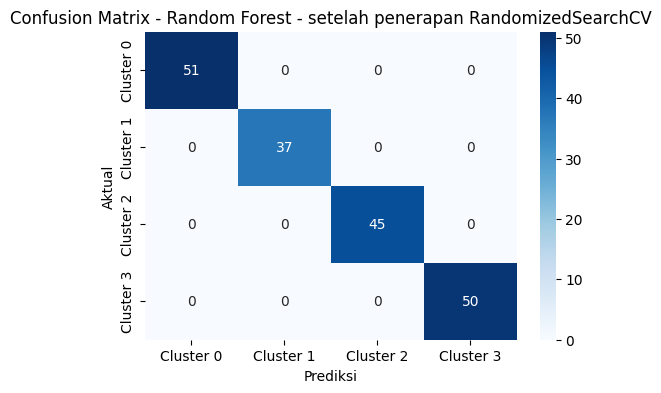

In [22]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Cluster {i}' for i in range(len(set(y)))], yticklabels=[f'Cluster {i}' for i in range(len(set(y)))])
plt.title("Confusion Matrix - Random Forest - setelah penerapan RandomizedSearchCV")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

### **Evaluasi untuk Decision Tree setelah penerapan RandomizedSearchCV**

In [23]:
dt_best_model = DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=6, random_state=42)
dt_best_model.fit(X_train, y_train)
y_pred_dt = dt_best_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')

print(f'Decision Tree - Akurasi: {dt_accuracy}')
print(f'Decision Tree - F1-Score: {dt_f1}')
print(f'Decision Tree - Precision: {dt_precision}')
print(f'Decision Tree - Recall: {dt_recall}')

Decision Tree - Akurasi: 1.0
Decision Tree - F1-Score: 1.0
Decision Tree - Precision: 1.0
Decision Tree - Recall: 1.0


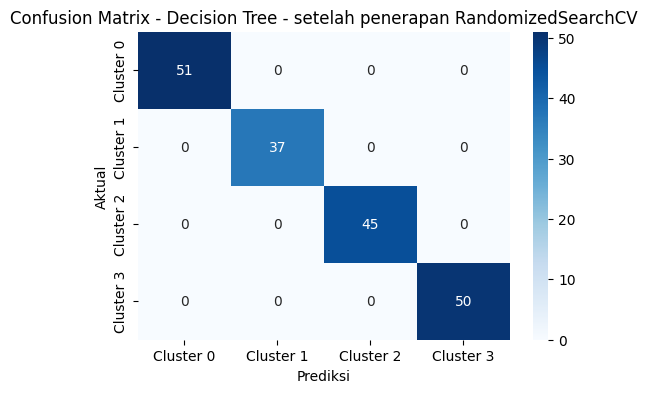

In [24]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Cluster {i}' for i in range(len(set(y)))], yticklabels=[f'Cluster {i}' for i in range(len(set(y)))])
plt.title("Confusion Matrix - Decision Tree - setelah penerapan RandomizedSearchCV")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [25]:
y_train_pred = rf_best_model.predict(X_train)
y_test_pred = rf_best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Akurasi Data Latih: {train_accuracy:}")
print(f"Akurasi Data Uji: {test_accuracy:}")

Akurasi Data Latih: 1.0
Akurasi Data Uji: 1.0


### Menghitung learning curve Random Forest

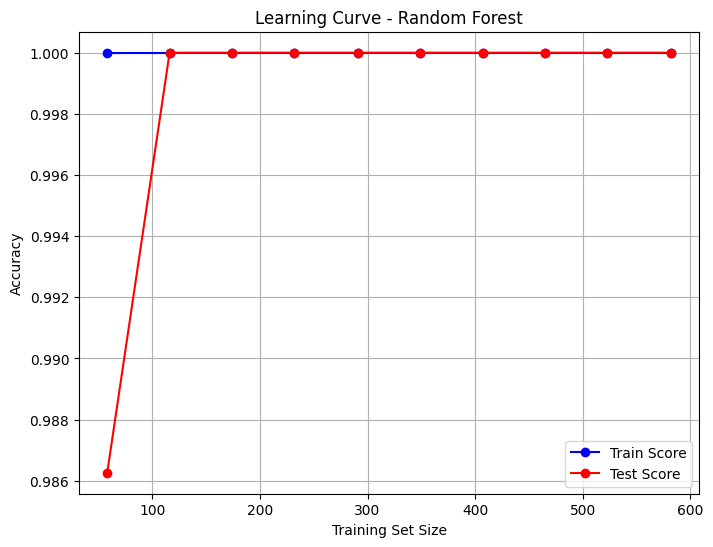

In [26]:

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Train Score", color='blue', marker='o')
plt.plot(train_sizes, test_mean, label="Test Score", color='red', marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

### Menghitung learning curve Decision Tree

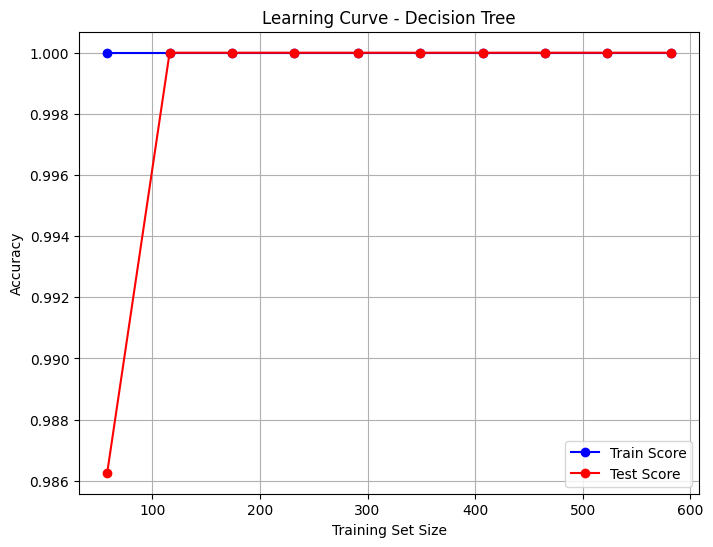

In [27]:
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Train Score", color='blue', marker='o')
plt.plot(train_sizes, test_mean, label="Test Score", color='red', marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).


Tidak ada perbedaan setelah dan sebelum tuning dilakukansama sama masih 100% baik itu yang random forest dan decision tree, sama sama memiliki nilai
- Akurasi: 100%
- F1-Score: 100%
- Precision: 100%
- Recall: 100%

baik sesudah penerapan RandomizedSearchCV nilainya masih sama sama 100% walapun sudah dilakukan cross cek overfitting juga sudah dilakukan.

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
    - Tidak ada kelemahan yang terlihat pada model. Dengan hasil yang sempurna (100%) untuk semua metrik, model tidak menunjukkan adanya masalah dengan precision atau recall pada kelas mana pun.

  - Apakah model mengalami overfitting atau underfitting?
    - Overfitting: Meskipun akurasi pada data latih dan uji sangat tinggi, ada potensi overfitting jika model terlalu "terlatih" pada data latih, tetapi tidak ada indikasi kuat overfitting dalam kasus ini karena model juga memiliki performa yang konsisten di data uji.
      - Akurasi pada Data Latih: 100.00%
      - Akurasi pada Data Uji: 100.00%
    - Underfitting: Model tidak menunjukkan tanda-tanda underfitting, karena hasil evaluasi menunjukkan kinerja yang sangat baik dan model mampu menangani data dengan sangat baik.


3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

- Tidak perlu tuning lebih lanjut: Hasil sudah sangat baik dengan akurasi dan metrik lainnya 100%.

- Kumpulkan lebih banyak data: Menambah data dapat membantu model lebih baik dalam menggeneralisasi.

- Coba algoritma lain: Jika diperlukan, eksperimen dengan algoritma lain seperti SVM atau KNN untuk perbandingan.